In [61]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Naive Bayes

In [62]:
data = pd.read_csv('titanic.csv')
# removing name column
data = data.drop(['name'], axis = 1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,0,1,female,2.00,1,2,151.5500,S
3,0,1,male,30.00,1,2,151.5500,S
4,0,1,female,25.00,1,2,151.5500,S


In [63]:
# split data
x_train, x_test, y_train, y_test = train_test_split(data.loc[:, 'pclass':], data['survived'],
                                                    test_size=0.2, stratify=data['survived'])

## Data preprocessing
NB can handle discrete features data which can be useful with categorical data.

Let's see one of the advantages of NB classifier. NB is not affected by data scaling

In [64]:
# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
scaled_x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

Train and test two NB models ono the data before scaling and one after scaling
and observe if the accuracy change with scaling

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Write code here
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print('Accuracy before scaling:', accuracy_score(y_test, y_pred))

# Write code here
nb = MultinomialNB()
nb.fit(scaled_x_train, y_train)
y_pred = nb.predict(scaled_x_test)
print('Accuracy after scaling:', accuracy_score(y_test, y_pred))

Accuracy before scaling: 0.6641221374045801
Accuracy after scaling: 0.6603053435114504


# Regularization
What is [Elastic-Net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)?
How can you specify the contribution of each part using l1 ration

Apply classification on the breast cancer dataset with no regularization, l1,
l2, and elastic-net.

### Loading Breast cancer dataset

In [66]:
X, y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Fitting both Lasso and Ridge

Fit 3 models: Lasso and Ridge and Elastic-Net.
Then print their accuracy and coefficients and notice the difference.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Write code here
lasso = Lasso()
ridge = Ridge()
elasticnet = ElasticNet()

lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)
elasticnet.fit(x_train, y_train)

print("Lasso accuracy:", lasso.score(x_test, y_test))
print("Ridge accuracy:", ridge.score(x_test, y_test))
print("Elastic-net accuracy:", elasticnet.score(x_test, y_test))

print("Lasso Coefficient:", *lasso.coef_)
print("Ridge Coefficient:", *ridge.coef_)
print("Elastic-net Coefficient:", *elasticnet.coef_)



Lasso accuracy: 0.5050858502268124
Ridge accuracy: 0.7409047788188953
Elastic-net accuracy: 0.5991912628640271
Lasso Coefficient: -0.0 -0.0 -0.0 -0.00023817212611857436 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -5.567846805999882e-05 -0.0004842808015410188 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
Ridge Coefficient: 0.17447187764135733 0.0015304457019466506 -0.0051305539835697685 -0.0012832452908063331 -0.1181843180114933 -0.01683135981327864 -0.1312886487247576 -0.2247603406278509 -0.15232778696946453 -0.007925154585503252 -0.12750204998563786 0.027210723580089295 -0.04046861093928094 0.0013877155613877018 -0.04830560276187072 0.05753029819699021 0.15943928370406069 -0.03971724081726225 -0.022043211916233693 0.00556860414925425 -0.26742485753351963 -0.014644271074137656 0.00942733895341191 0.0012521896235563137 -0.2768667146907811 -0.11419131061189816 -0.21257357736430182 -0.4512617591636744 -0.3118567307555582 -0.06081196749339417
Elastic-net Coeffi

# KNN
Compare KNN vs logistic regression

---
In ML images can be flattened to 1D vector of pixels, then we can train our
models on them considering each pixel as a feature.

Dataset shape (1797, 8, 8)


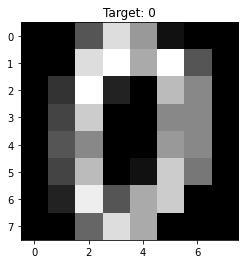

Now we have 1797 images flattened to 64-values vectors


In [78]:
# Based on https://github.com/hsu-ai-course/hsu.ai/blob/master/code/12.%20kNN%20and%20ANN%20for%20MNIST.ipynb
digits = load_digits()

print("Dataset shape", digits.images.shape)

# show first image
plt.title(f"Target: {digits.target[0]}")
plt.imshow(digits.images[0], cmap='gray')
plt.show()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target
print("Now we have {} images flattened to {}-values vectors".format(*X.shape))

In [79]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Train a KNN and LR models and compare their results

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Write code here

knn = KNeighborsClassifier()
LR = LogisticRegression()

knn.fit(X_train, y_train)
LR.fit(X_train, y_train)

y_true, y_pred = y_test, knn.predict(X_test)
print('KNN', classification_report(y_true, y_pred))

y_true, y_pred = y_test, LR.predict(X_test)
print('LR', classification_report(y_true, y_pred))

KNN               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.95      1.00      0.97        35
           2       1.00      0.94      0.97        36
           3       0.90      0.97      0.93        29
           4       0.97      0.97      0.97        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.95      0.97      0.96        39
           8       0.97      0.92      0.95        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

LR               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3     

Which model performed better? What is the advantages of each model over the other?

What is the output of `classification_report` function? How to interpret it?

#### Logistic regresion
Logistic regression is the correct algorithm for starting with classification algorithms, much like linear regression. Eventually, when the term ‘Regression’ appears, it is not a model of regression, but a model of classification. To frame the binary output model, it utilizes a logistic function. The output of the logistic regression will be a probability (0≤x≤1), and can be adopted to predict the binary 0 or 1 as the output (if x<0.5, output= 0, else output=1).

The advantages:
* A convenient, quick and straightforward method of classification.
* Parameters explain the direction and intensity of significance of the independent variables over the dependent variable.
* Can be used for multiclass classifications also.
* The function for loss is always convex.

The disadvantages:
* It can not be extended to problems of non-linear classification.
* Proper feature selection is required.
* A good ratio of signal to noise is required.
* The precision of the LR model tampers with colinearity and outliers.



#### K-Nearest Neighbours

A non-parametric approach used for classification and regression is K-nearest neighbours. It is one of the simplest methods used for ML. It is a lazy model for learning, with local approximation.

The advantages:
* A quick and straightforward model of machine learning.
* A few tuneable hyperparameters.

The disadvantages:
* K should be chosen wisely.
* High runtime computing costs if the sample size is large.
* For equal treatment between features, proper scaling should be given.


#### Output of `classification_report`

Text summary of the precision, recall, F1 score for each class.
The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.